<a href="https://colab.research.google.com/github/Whaleman0423/Deep_Learning_model/blob/main/transfer_learning_keras1105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, utils, activations, losses, optimizers, metrics
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from glob import glob 
from tqdm import tqdm 
from sklearn.model_selection import train_test_split
import pandas as pd

# Define Parameters

In [3]:
num_classes = 3
IMG_SIZE = 224

# download from google drive or upload file by yourself

In [4]:
!gdown --id '1QHVsHvYPUw6IhOYn7ayUkZ_L95KVcPQ4' --output retina-dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1QHVsHvYPUw6IhOYn7ayUkZ_L95KVcPQ4
To: /content/retina-dataset.zip
100% 35.1M/35.1M [00:00<00:00, 43.0MB/s]


# unzip dataset file

In [5]:
!unzip -q retina-dataset.zip

#Data Visualization

In [7]:
paths = glob('retina-train/*.jpeg')
paths_test = sorted(glob('retina-test/*.jpeg'))
len(paths), len(paths_test)

(2086, 522)

In [44]:
paths

['retina-train/39882_right_0.jpeg',
 'retina-train/38186_right_2.jpeg',
 'retina-train/20573_right_0.jpeg',
 'retina-train/24916_right_0.jpeg',
 'retina-train/264_right_1.jpeg',
 'retina-train/16390_right_0.jpeg',
 'retina-train/17415_left_1.jpeg',
 'retina-train/24484_right_0.jpeg',
 'retina-train/30747_right_2.jpeg',
 'retina-train/43199_left_2.jpeg',
 'retina-train/37926_left_0.jpeg',
 'retina-train/12895_left_1.jpeg',
 'retina-train/17426_left_2.jpeg',
 'retina-train/36628_left_0.jpeg',
 'retina-train/9173_right_1.jpeg',
 'retina-train/24974_left_0.jpeg',
 'retina-train/15938_left_1.jpeg',
 'retina-train/44115_left_0.jpeg',
 'retina-train/1536_right_1.jpeg',
 'retina-train/28077_right_2.jpeg',
 'retina-train/14698_left_0.jpeg',
 'retina-train/18909_left_1.jpeg',
 'retina-train/44178_left_0.jpeg',
 'retina-train/30242_right_0.jpeg',
 'retina-train/27647_left_0.jpeg',
 'retina-train/15414_left_2.jpeg',
 'retina-train/1928_right_1.jpeg',
 'retina-train/17686_left_1.jpeg',
 'retina-tra

retina-train/33906_right_2.jpeg


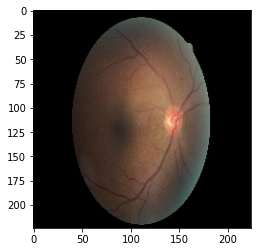

In [26]:
idx = np.random.randint(0, len(paths), size=1)[0]  # 隨機取一張圖
# idx
path = paths[idx]
# print(path.shape)
img = cv2.imread(path)
plt.imshow(img[:, :, ::-1])
print(path)
# print(img)

In [ ]:
# print(type(img))  # 看看img 的樣子
# print(img.shape)
# for i in img:
#   print(i)
# # print(img)

######Histogram Equalization 直方圖均衡化 是用於將一幅圖像的像素的色彩強度平均分佈，令圖像提高對比度及擁有更豐富的色彩，而且能使圖像不會過暗或過亮，常用於過暗或過亮的圖片美化。

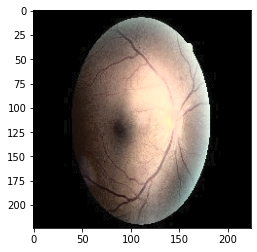

In [39]:
# Histogram Equalization
img_y_cr_b = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
# print(img_y_cr_b.shape)
y, cr, cb = cv2.split(img_y_cr_b)

# Applying equalize Hist operation on Y channel.
y_eq = cv2.equalizeHist(y)
img_y_cr_b_eq = cv2.merge((y_eq, cr, cb))
# img_y_cr_b_eq.shape
img_rgb_eq = cv2.cvtColor(img_y_cr_b_eq, cv2.COLOR_YCR_CB2RGB)
plt.imshow(img_rgb_eq)

In [55]:
# os.path.split()  函數將文件路徑和文件名稱分開
all_filenames = [os.path.split(p)[1] for p in paths] # path => ***.jpeg
print(all_filenames[:3])

all_cls = [int(name.split('.')[0].split('_')[-1]) for name in all_filenames]
print(all_cls[:3])

['39882_right_0.jpeg', '38186_right_2.jpeg', '20573_right_0.jpeg', '24916_right_0.jpeg', '264_right_1.jpeg', '16390_right_0.jpeg', '17415_left_1.jpeg', '24484_right_0.jpeg', '30747_right_2.jpeg', '43199_left_2.jpeg']
[0, 2, 0, 0, 1, 0, 1, 0, 2, 2]


# Classs distribution

######借助np.unique()方法，我們可以從作為參數給出的數組中獲取唯一值np.unique()方法。
######numpy.unique(ar, return_index=False, return_inverse=False, return_counts=False, axis=None)

[0 1 2] [1215  560  311]


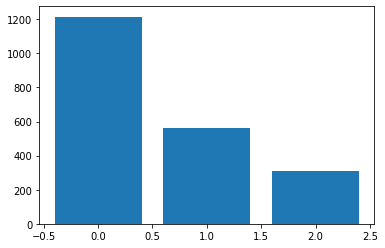

In [56]:
cls, count = np.unique(all_cls, return_counts=True)
plt.bar(cls, count)
print(cls, count)